In [1]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from tqdm import tqdm
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [86]:
SPEC = "switchgrass"

In [87]:
def lower_collect(seq):
    temp = []
    for s in seq:
        if s.islower(): temp.append(s)
    return temp

In [88]:
raw_data = {}
with open(f"./{SPEC}_validate/{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if len(record.id) < 4: 
            raw_data[record.id] = []
        
with open(f"./{SPEC}_validate/{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if len(record.id) < 4:
            # raw_data[record.id] += lower_collect(record.seq)
            raw_data[record.id] += str(record.seq).lower()

data = {}
for k in raw_data.keys():
    data[k] = "".join(raw_data[k])
    

del raw_data

In [89]:
data.keys()

dict_keys(['1K', '1N', '2K', '2N', '3K', '3N', '4K', '4N', '5K', '5N', '6K', '6N', '7K', '7N', '8K', '8N', '9K', '9N'])

In [90]:
try: 
    del data[""]
    del data["com"]
except: pass

In [91]:
data.keys()

dict_keys(['1K', '1N', '2K', '2N', '3K', '3N', '4K', '4N', '5K', '5N', '6K', '6N', '7K', '7N', '8K', '8N', '9K', '9N'])

In [109]:
def signal_generator(seq):
    #signal = {"A":[], "T":[], "G":[], "C":[]}
    signal = []
    # A: 135.13 T: 126.115 G: 151.13 C: 111.10
    # properties = [135.13, 126.115, 151.13, 111.10]
    
    # weight = {"a": (properties[0] - np.mean(properties))/np.std(properties), "t": (properties[1] - np.mean(properties))/np.std(properties), \
    #           "g": (properties[2] - np.mean(properties))/np.std(properties), "c": (properties[3] - np.mean(properties))/np.std(properties), "N": 0}
    weight = {"a": 1+1j, "t": 1-1j, "g": -1-1j, "c": -1+1j}
    
    #for k in signal.keys():
    #    for s in seq:
    #        if s == k: signal[k].append(10)
    #        else: signal[k].append(-10)
    for s in seq:
        signal.append(weight[s])
    return signal

In [110]:
signal_data = {}
for k in tqdm(data.keys()):
    signal_data[k] = signal_generator(data[k])

100%|██████████| 18/18 [00:02<00:00,  6.69it/s]


In [115]:
fft_vector = {}
N = max([len(d) for d in data.values()])
for k in tqdm(data.keys()):
    #fft_vector[k] = abs(np.fft.fft(signal_data[k]["A"], N) / len(signal_data[k]["A"])) + abs(np.fft.fft(signal_data[k]["T"], N) / len(signal_data[k]["T"])) + abs(np.fft.fft(signal_data[k]["G"], N) / len(signal_data[k]["G"])) + abs(np.fft.fft(signal_data[k]["C"], N) / len(signal_data[k]["C"]))
    fft_vector[k] = np.fft.fft(signal_data[k], N).real / len(signal_data[k])
    # fft_vector[k] = signal.lombscargle(range(len(signal_data[k])), signal_data[k], np.linspace(0.001, len(signal_data[k]), N), normalize=True)
"""from multiprocessing import Process, Queue
def work(k, N, result):
    result.put(abs(np.fft.fft(signal_data[k], N) / len(signal_data[k])))
    return

p = []
result = Queue()
for i in range(len(data.keys())):
    p.append(Process(target=work, args=(list(signal_data.keys())[i], N, result)))
for i in range(len(data.keys())):
    p[i].start()
for i in range(len(data.keys())):
    p[i].join()
result.put("stop")
print("Calculation ended")

fft_vector = {}
cnt = 0
while True:
    tmp = result.get()
    print(f"appending {i} result")
    if tmp == "stop":
        cnt+=1
        break
    else:
        fft_vector[list(signal_data.keys())[cnt]] = tmp
        cnt+=1"""

100%|██████████| 18/18 [00:13<00:00,  1.37it/s]


'from multiprocessing import Process, Queue\ndef work(k, N, result):\n    result.put(abs(np.fft.fft(signal_data[k], N) / len(signal_data[k])))\n    return\n\np = []\nresult = Queue()\nfor i in range(len(data.keys())):\n    p.append(Process(target=work, args=(list(signal_data.keys())[i], N, result)))\nfor i in range(len(data.keys())):\n    p[i].start()\nfor i in range(len(data.keys())):\n    p[i].join()\nresult.put("stop")\nprint("Calculation ended")\n\nfft_vector = {}\ncnt = 0\nwhile True:\n    tmp = result.get()\n    print(f"appending {i} result")\n    if tmp == "stop":\n        cnt+=1\n        break\n    else:\n        fft_vector[list(signal_data.keys())[cnt]] = tmp\n        cnt+=1'

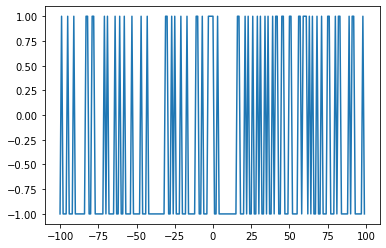

In [116]:
plt.plot(np.arange(-100,100, 1), signal_data["1K"][:200])

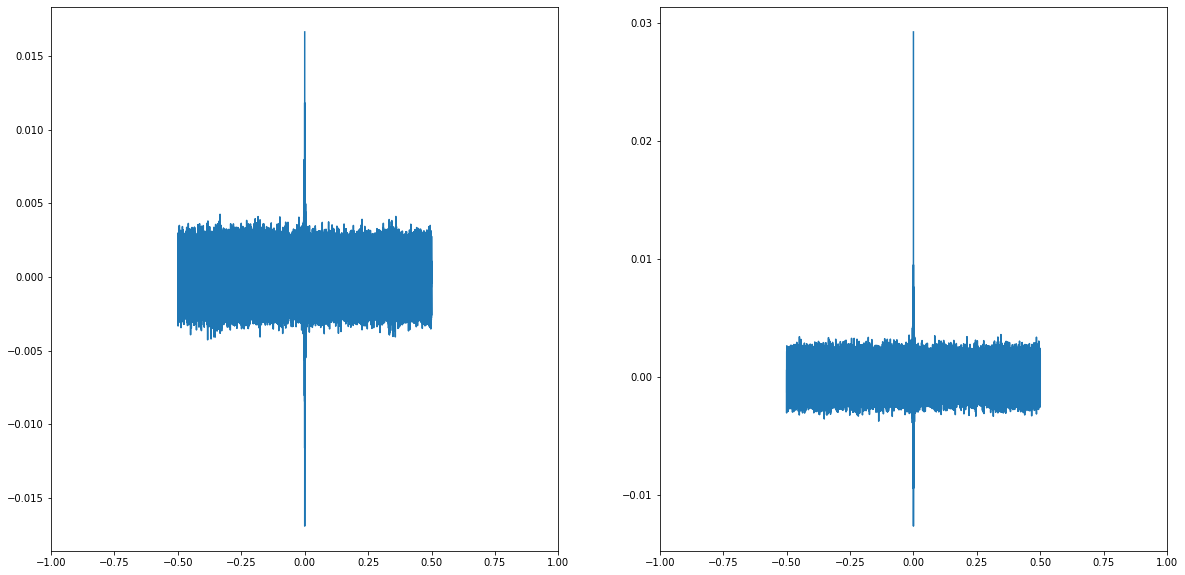

In [117]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.xlim(-1, 1)
plt.plot(np.fft.fftfreq(len(fft_vector["1K"]), 1), fft_vector[f"1K"])
plt.subplot(1, 2, 2)
plt.xlim(-1, 1)
plt.plot(np.fft.fftfreq(len(fft_vector["1N"]), 1), fft_vector[f"1N"])

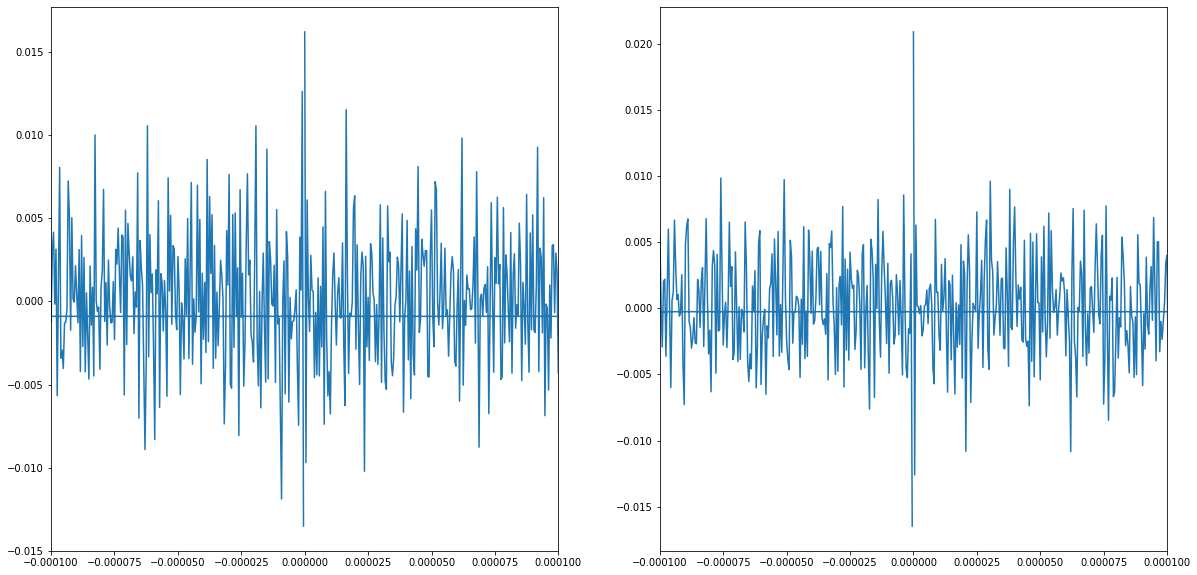

In [118]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.xlim(-0.0001, 0.0001)
plt.plot(np.fft.fftfreq(len(fft_vector["2K"]), 1), fft_vector[f"2K"])
plt.subplot(1, 2, 2)
plt.xlim(-0.0001, 0.0001)
plt.plot(np.fft.fftfreq(len(fft_vector["2N"]), 1), fft_vector[f"2N"])

In [119]:
list(np.fft.fftfreq(10, 1))

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 -0.5,
 -0.4,
 -0.30000000000000004,
 -0.2,
 -0.1]

In [123]:
df = pd.DataFrame(fft_vector)
#df = df[df_original >= df_original.quantile(.01)]
#df = df[df_original < df_original.quantile(.99)]
#df.fillna(0, inplace=True)
df = pd.concat([df[:200], df[-200:]], axis=0)
df

,1K,1N,2K,2N,3K,3N,4K,4N,5K,5N,6K,6N,7K,7N,8K,8N,9K,9N
0,0.016648,0.029234,0.016204,0.020917,0.012530,0.022953,0.019105,0.032126,0.013886,0.019807,0.024721,0.037286,0.021963,0.031548,0.037531,0.045610,0.008493,0.019015
1,-0.001268,-0.012617,-0.009697,-0.012588,-0.021058,-0.018360,-0.008331,-0.019344,-0.008511,-0.023385,-0.006393,-0.011980,0.019158,0.008751,-0.013191,-0.015516,-0.018950,-0.021796
2,-0.013044,-0.002559,0.006100,0.006306,0.006718,-0.000784,-0.014299,-0.006014,-0.010665,-0.003570,-0.004733,-0.004109,-0.010129,-0.004149,-0.006276,0.001146,0.006704,-0.001419
3,-0.005282,0.008059,0.000249,0.000206,-0.001608,0.003360,0.012400,0.002315,0.004345,0.002457,-0.005944,-0.001546,0.007214,0.006102,-0.003489,-0.002600,-0.002566,-0.002277
4,0.006191,0.005151,-0.001819,0.000131,-0.005396,0.003427,0.007802,-0.000961,0.000796,0.000706,0.007322,-0.007862,0.001824,0.002109,0.001608,-0.000432,0.001124,0.003935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080324,-0.005067,-0.002587,-0.007452,-0.005239,0.001086,0.006022,0.000159,0.012215,0.007973,0.001913,-0.008674,0.008081,0.006673,-0.006041,-0.003072,0.001387,0.001917,-0.001656
2080325,0.009295,-0.000711,0.003862,-0.001542,-0.002679,-0.005737,0.000993,-0.006007,-0.000397,0.003171,0.003508,0.001000,0.003567,0.002217,0.002534,0.000197,-0.000785,0.005586
2080326,0.001551,-0.000161,0.000686,-0.001884,-0.006339,-0.000839,0.002061,0.003813,-0.003571,0.001011,-0.005159,-0.003786,0.004293,-0.000822,-0.004868,0.003097,-0.005097,-0.005442
2080327,-0.009269,-0.000406,0.012619,0.004128,0.004219,0.005044,-0.013395,-0.001786,-0.004054,-0.000087,-0.008808,-0.000218,-0.007764,-0.007293,-0.005564,-0.006725,0.002277,0.000929


Linkage map calculation ended


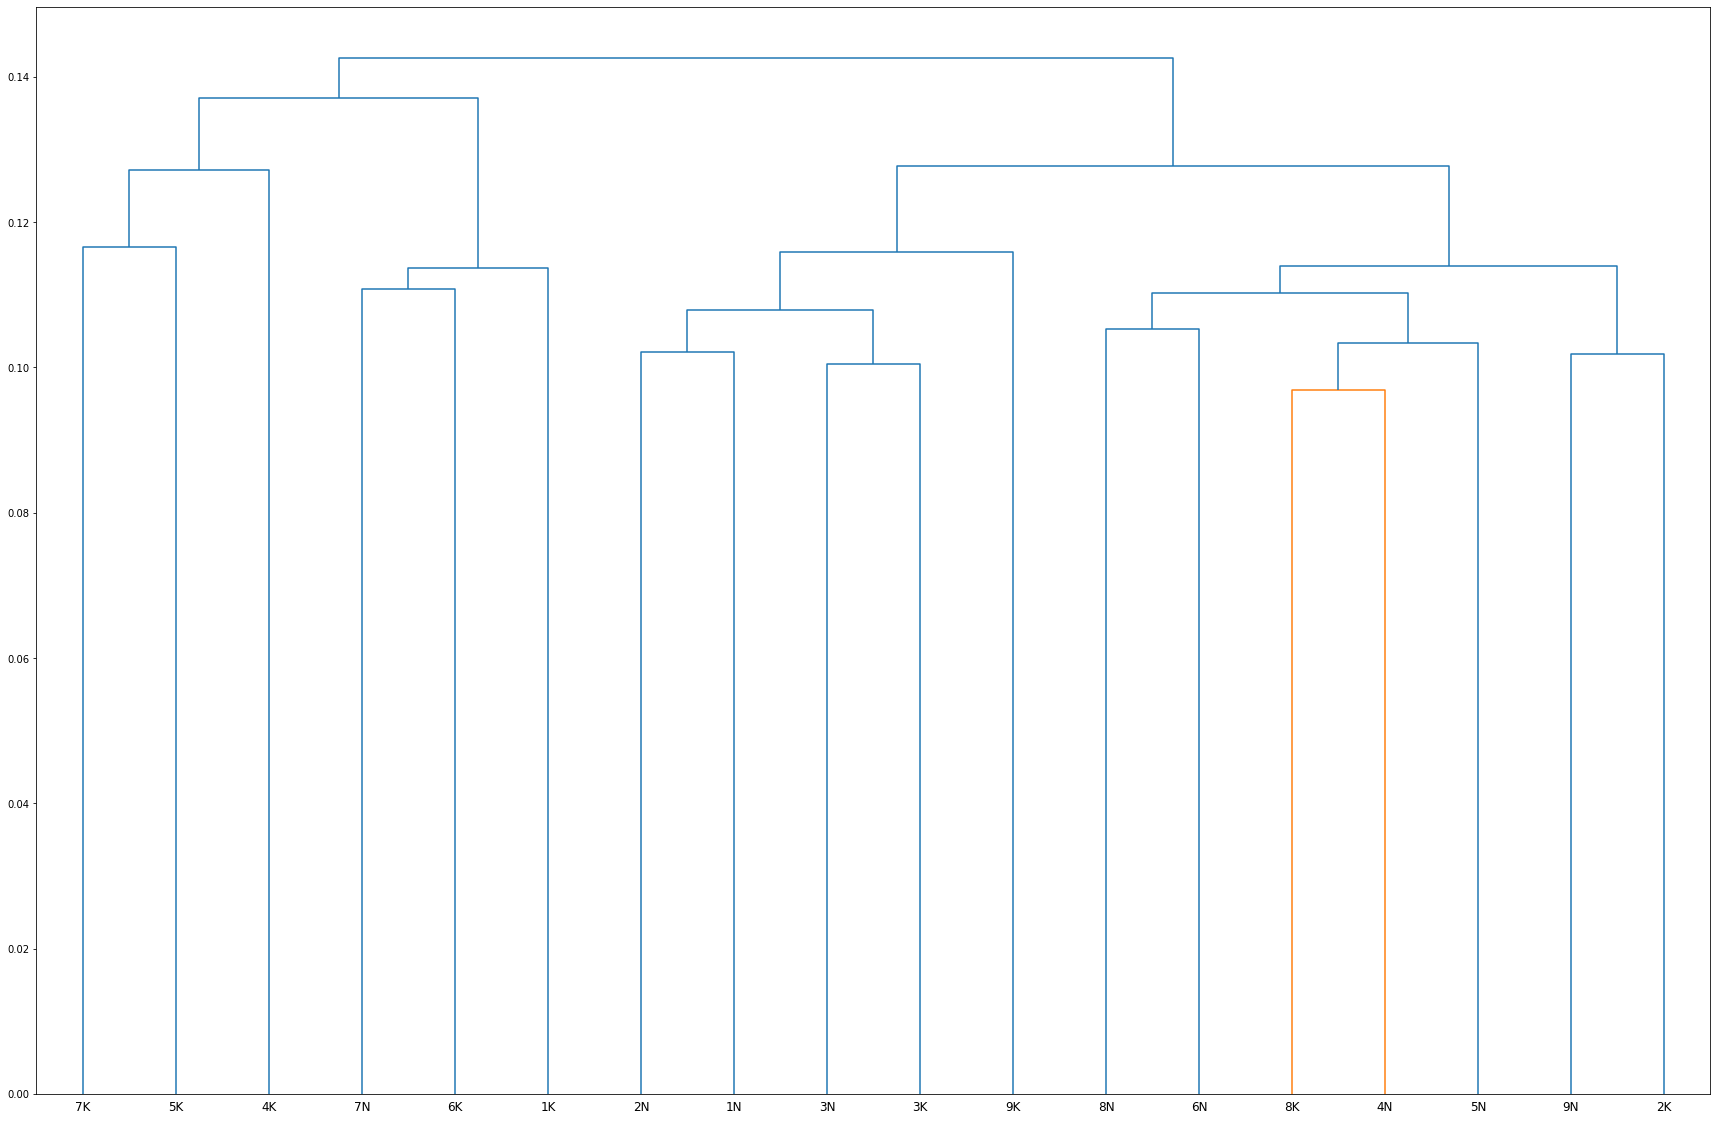

In [124]:
plt.figure(figsize=(30, 20))
linked = linkage(df.T, method="ward")
print("Linkage map calculation ended")
dend = dendrogram(linked, orientation='top', distance_sort='descending', \
                  labels=list(df.T.index), show_leaf_counts=True)
plt.savefig(f"./{SPEC}_dendrogram.png")

<AxesSubplot:ylabel='Frequency'>

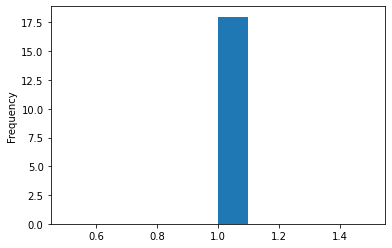

In [45]:
from sklearn.mixture import GaussianMixture
gmm_np = GaussianMixture(n_components=2, random_state=39).fit_predict(df[:100000])
gmm_l = list(gmm_np)
gmm_dict = {}
for n, v in zip(data.keys(), gmm_l):
    gmm_dict[n] = v
gmm_df = pd.Series(gmm_dict)
gmm_df.plot(kind="hist")

In [46]:
gmm_df

1K    1
1N    1
2K    1
2N    1
3K    1
3N    1
4K    1
4N    1
5K    1
5N    1
6K    1
6N    1
7K    1
7N    1
8K    1
8N    1
9K    1
9N    1
dtype: int64

In [68]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=39)
model.fit(df)
kmeans = model.fit_predict(df[:-200])
kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)